In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import pylab

In [2]:
df = pd.read_csv("Cellphone.csv")

In [3]:
df.shape

(161, 14)

In [4]:
df.head()

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('Product_id', axis = 1, inplace = True)

In [9]:
df.describe()

Price         Sale      weight  resoloution         ppi  \
count   161.000000   161.000000  161.000000   161.000000  161.000000   
mean   2215.596273   621.465839  170.426087     5.209938  335.055901   
std     768.187171  1546.618517   92.888612     1.509953  134.826659   
min     614.000000    10.000000   66.000000     1.400000  121.000000   
25%    1734.000000    37.000000  134.100000     4.800000  233.000000   
50%    2258.000000   106.000000  153.000000     5.150000  294.000000   
75%    2744.000000   382.000000  170.000000     5.500000  428.000000   
max    4361.000000  9807.000000  753.000000    12.200000  806.000000   

         cpu core    cpu freq  internal mem         ram     RearCam  \
count  161.000000  161.000000    161.000000  161.000000  161.000000   
mean     4.857143    1.502832     24.501714    2.204994   10.378261   
std      2.444016    0.599783     28.804773    1.609831    6.181585   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      4.000000    1.200000      8.000000    1.000000    5.000000   
50%      4.000000    1.400000     16.000000    2.000000   12.000000   
75%      8.000000    1.875000     32.000000    3.000000   16.000000   
max      8.000000    2.700000    128.000000    6.000000   23.000000   

        Front_Cam      battery   thickness  
count  161.000000   161.000000  161.000000  
mean     4.503106  2842.111801    8.921739  
std      4.342053  1366.990838    2.192564  
min      0.000000   800.000000    5.100000  
25%      0.000000  2040.000000    7.600000  
50%      5.000000  2800.000000    8.400000  
75%      8.000000  3240.000000    9.800000  
max     20.000000  9500.000000   18.500000

In [10]:
scal = MinMaxScaler()
df1 = scal.fit_transform(df)
df = pd.DataFrame(df1, columns = df.columns)
df.head()

Price      Sale    weight  resoloution       ppi  cpu core  cpu freq  \
0  0.465172  0.000000  0.100437     0.351852  0.442336      1.00  0.500000   
1  0.302909  0.000000  0.085881     0.240741  0.163504      0.25  0.481481   
2  0.347478  0.000000  0.064047     0.305556  0.278832      0.50  0.444444   
3  0.187083  0.000102  0.076419     0.240741  0.163504      0.25  0.481481   
4  0.302909  0.000102  0.085881     0.240741  0.163504      0.25  0.481481   

   internal mem       ram   RearCam  Front_Cam   battery  thickness  
0       0.12500  0.500000  0.565217       0.40  0.208046   0.171642  
1       0.03125  0.166667  0.136957       0.00  0.103448   0.358209  
2       0.06250  0.250000  0.565217       0.25  0.137931   0.186567  
3       0.03125  0.085333  0.136957       0.00  0.068966   0.440299  
4       0.03125  0.166667  0.136957       0.00  0.103448   0.358209

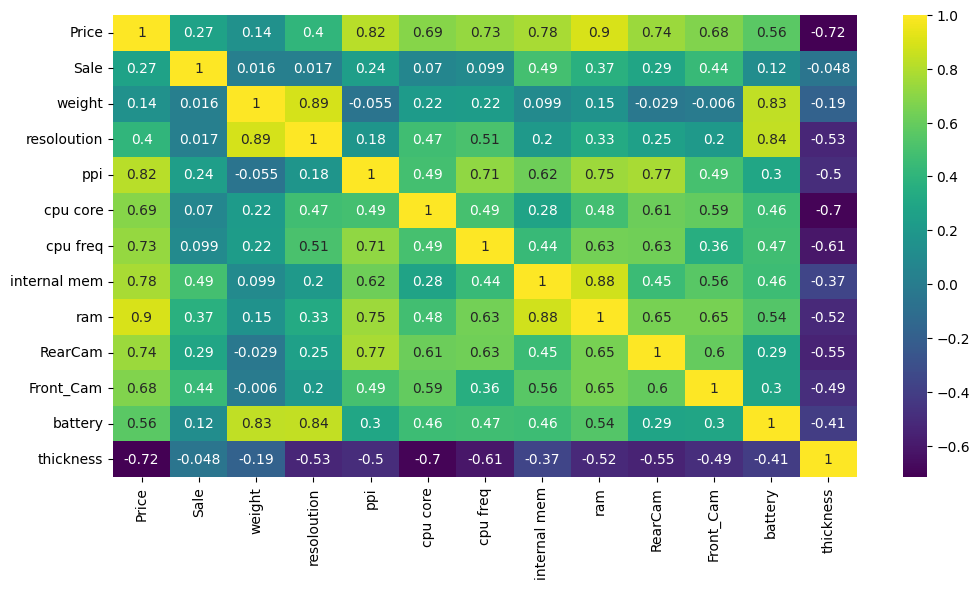

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

# Feature Selection:

In [12]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [13]:
calc_vif(df[[i for i in df.columns if i not in ['Price','resoloution','weight','ppi','cpu freq','Sale','cpu core']]])

variables        VIF
0  internal mem   8.111014
1           ram  21.566337
2       RearCam   7.215163
3     Front_Cam   4.031680
4       battery   4.089450
5     thickness   1.756533

In [14]:
df.drop(['resoloution','weight','ppi','cpu freq','Sale','cpu core'], axis = 1, inplace = True)

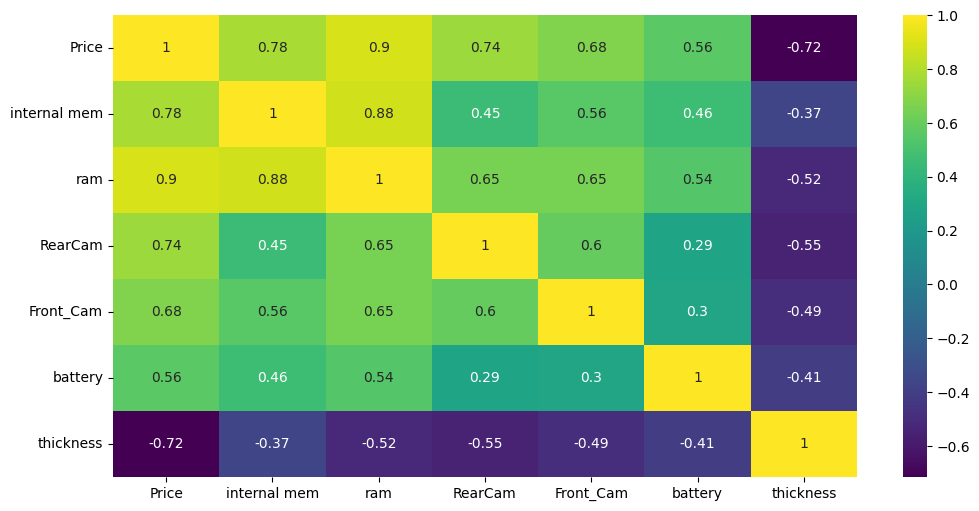

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

# Checking for Gaussion Distribution:

In [16]:
def plot_data(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(10, 4 * num_columns))
    
    for i, column in enumerate(df.columns):
        # Histogram
        sns.histplot(df[column], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram for {column}')
        
        # Probability plot
        stats.probplot(df[column], dist='norm', plot=axes[i, 1])
        axes[i, 1].set_title(f'Probability Plot for {column}')
    
    plt.tight_layout()
    plt.show()

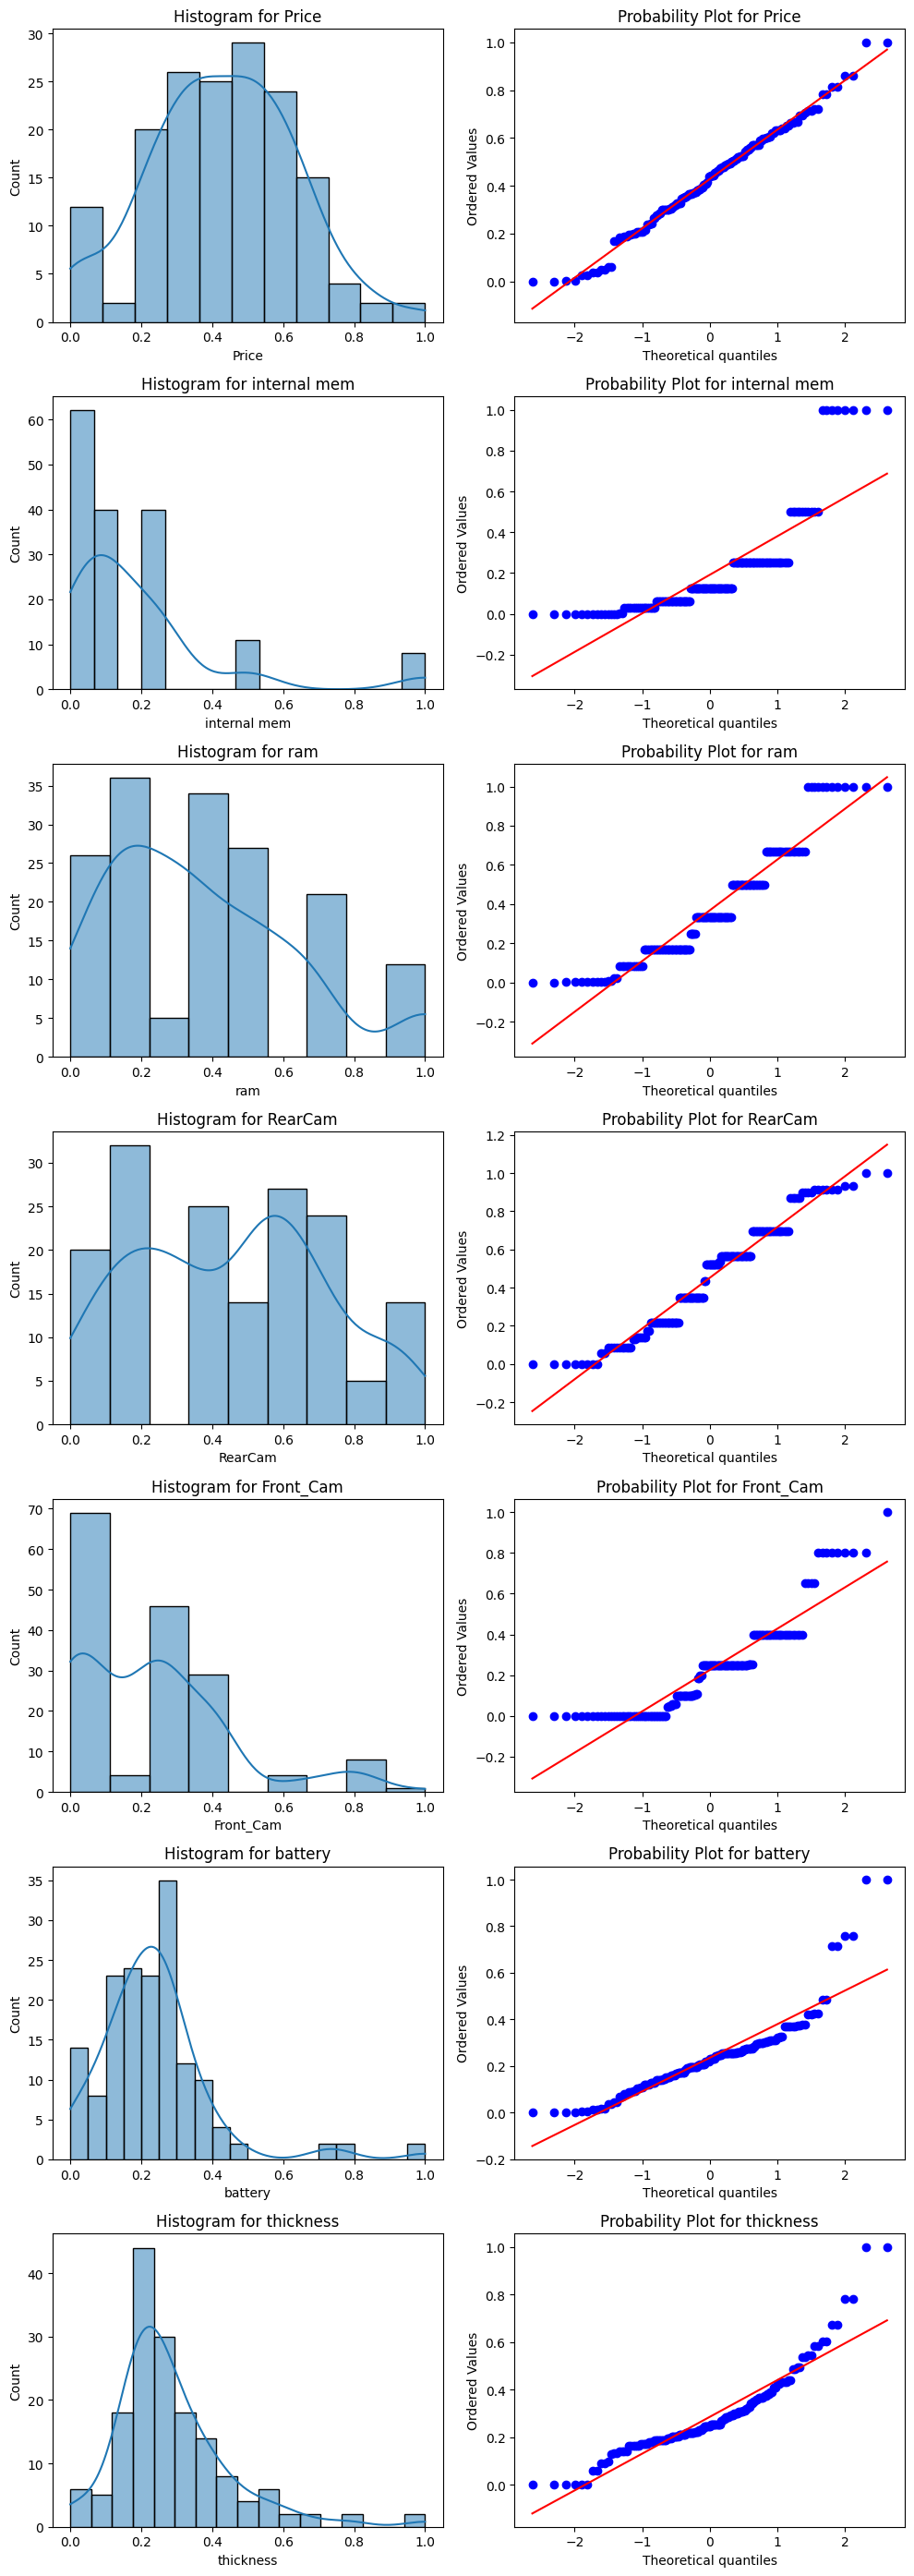

In [17]:
plot_data(df)

In [18]:
df.columns

Index(['Price', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery',
       'thickness'],
      dtype='object')

# Transformatio with 'yeo-johnson'

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df= pd.DataFrame(pt.fit_transform(df), columns=df.columns)

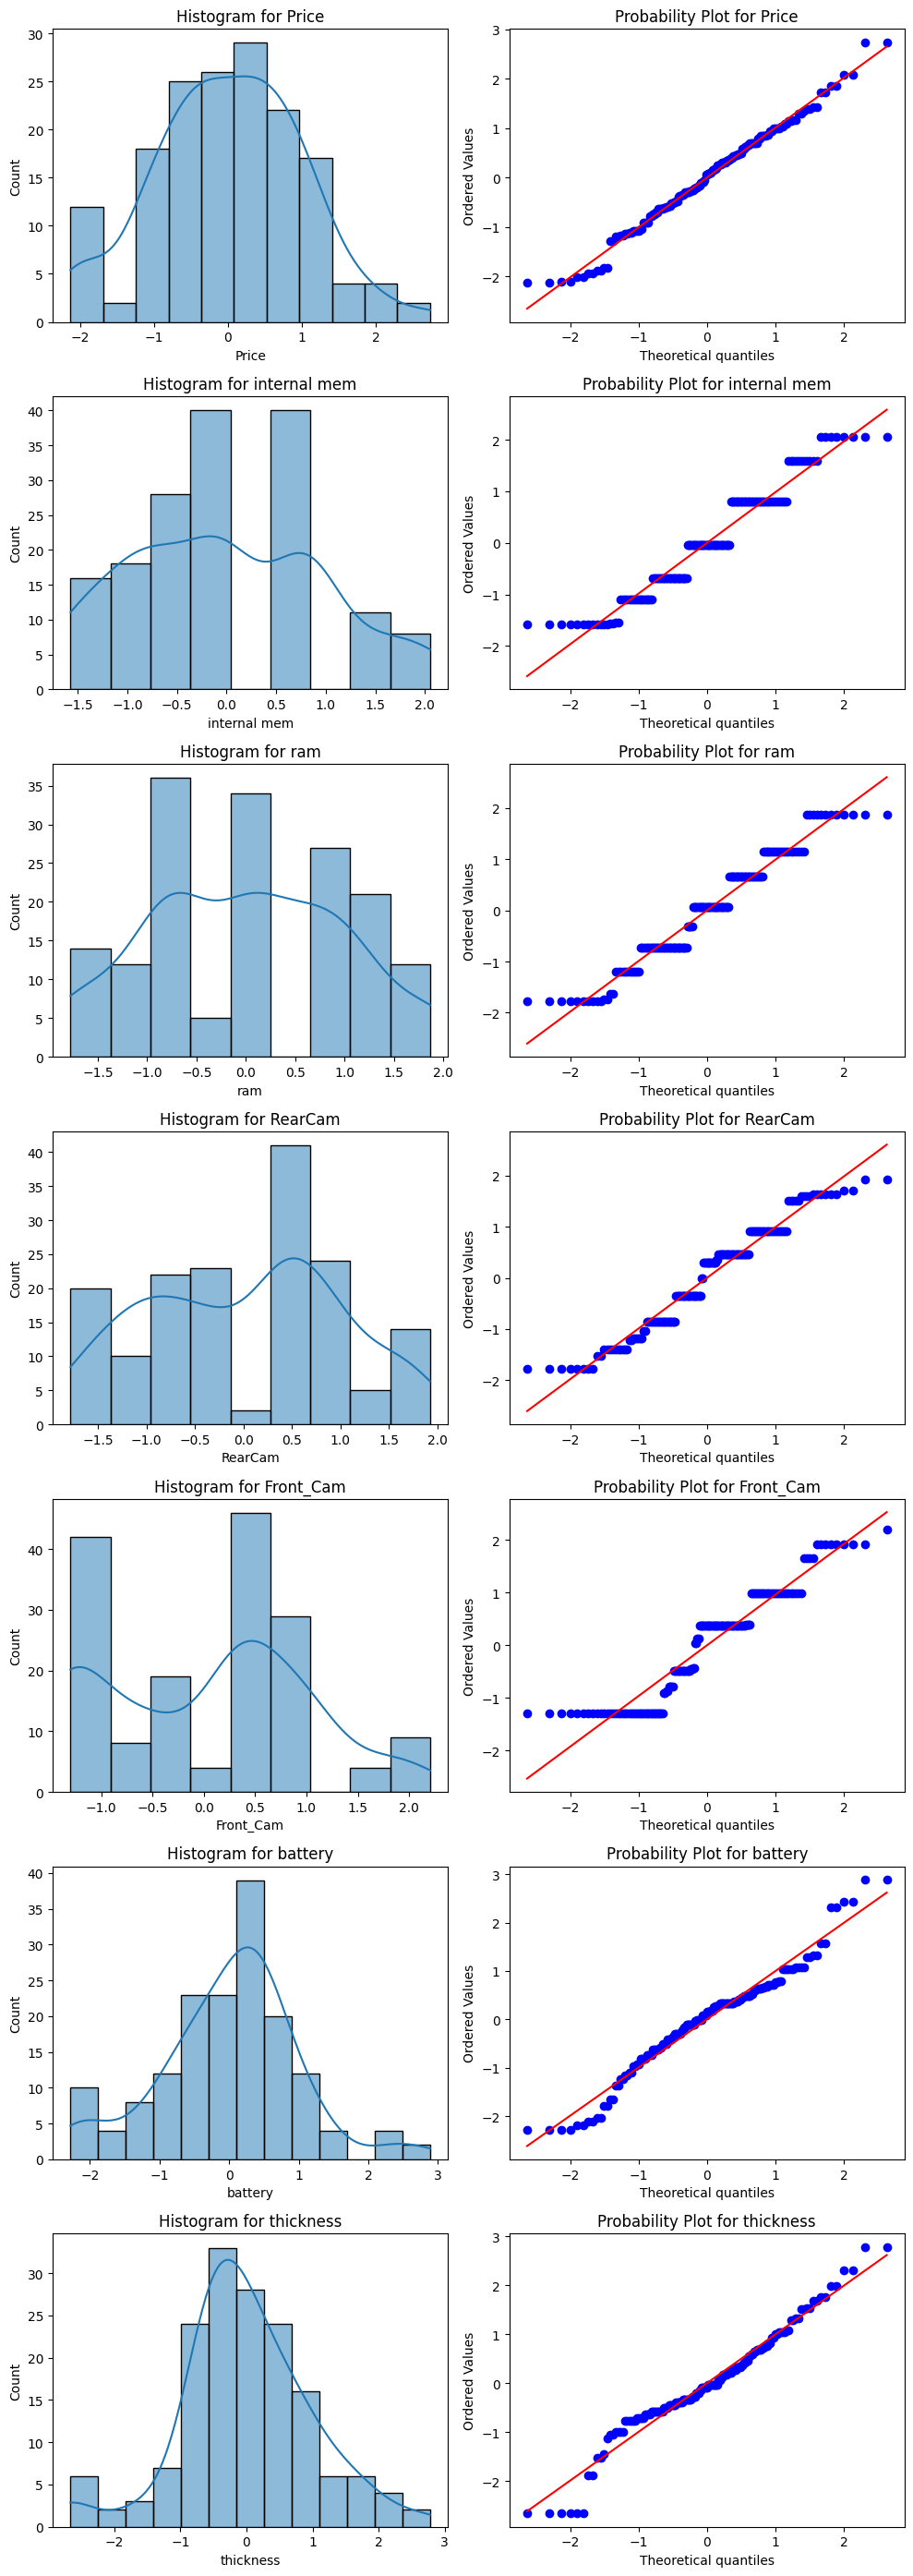

In [20]:
plot_data(df)

In [21]:
df.describe()

Price  internal mem           ram       RearCam     Front_Cam  \
count  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02   
mean  -1.930823e-17  6.309653e-17  1.379159e-16  2.689360e-16 -1.103327e-17   
std    1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00   
min   -2.129940e+00 -1.573130e+00 -1.777883e+00 -1.784059e+00 -1.298757e+00   
25%   -6.219090e-01 -6.881354e-01 -7.255333e-01 -8.603833e-01 -1.298757e+00   
50%    6.572999e-02 -4.284763e-02  5.869151e-02  3.048324e-01  3.754633e-01   
75%    6.948705e-01  7.970348e-01  6.652445e-01  9.190096e-01  9.820178e-01   
max    2.737588e+00  2.052245e+00  1.867802e+00  1.923096e+00  2.205299e+00   

            battery     thickness  
count  1.610000e+02  1.610000e+02  
mean   2.758318e-16  1.103327e-17  
std    1.003120e+00  1.003120e+00  
min   -2.278796e+00 -2.661439e+00  
25%   -5.807450e-01 -5.777797e-01  
50%    1.604414e-01 -9.761261e-02  
75%    5.165557e-01  5.966301e-01  
max    2.887838e+00  2.779261e+00

df2 = df.copy()

df2[['internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery','thickness']] = np.log(df2[['internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery','thickness']])

plot_data(df2)

# Handel Outliers:

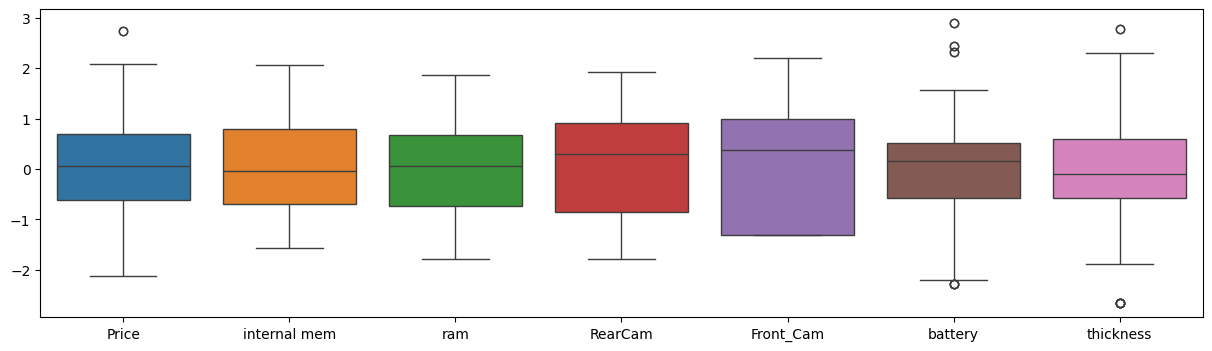

In [22]:
plt.figure(figsize=(15,4))
sns.boxplot(df)
plt.show()

In [23]:
def outlier_data(df):
    df_outlier = df.copy()
    for column in df.columns:
        upper_limit = df[column].mean() + 3*df[column].std()
        lower_limit = df[column].mean() - 3*df[column].std()
        
        df_outlier[column] = df_outlier[column].apply(lambda x: upper_limit if x > upper_limit else x)
        
        df_outlier[column] = df_outlier[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    return df_outlier   

In [24]:
df = outlier_data(df)

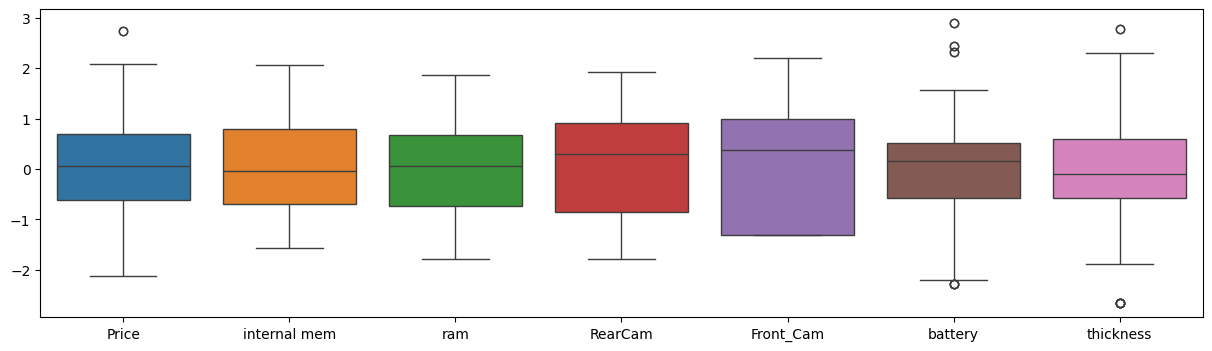

In [25]:
plt.figure(figsize=(15,4))
sns.boxplot(df)
plt.show()

df2.replace([np.inf, -np.inf], 0, inplace=True)
df2.fillna(0, inplace = True)

In [26]:
df.describe()

Price  internal mem           ram       RearCam     Front_Cam  \
count  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02   
mean  -1.930823e-17  6.309653e-17  1.379159e-16  2.689360e-16 -1.103327e-17   
std    1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00   
min   -2.129940e+00 -1.573130e+00 -1.777883e+00 -1.784059e+00 -1.298757e+00   
25%   -6.219090e-01 -6.881354e-01 -7.255333e-01 -8.603833e-01 -1.298757e+00   
50%    6.572999e-02 -4.284763e-02  5.869151e-02  3.048324e-01  3.754633e-01   
75%    6.948705e-01  7.970348e-01  6.652445e-01  9.190096e-01  9.820178e-01   
max    2.737588e+00  2.052245e+00  1.867802e+00  1.923096e+00  2.205299e+00   

            battery     thickness  
count  1.610000e+02  1.610000e+02  
mean   2.758318e-16  1.103327e-17  
std    1.003120e+00  1.003120e+00  
min   -2.278796e+00 -2.661439e+00  
25%   -5.807450e-01 -5.777797e-01  
50%    1.604414e-01 -9.761261e-02  
75%    5.165557e-01  5.966301e-01  
max    2.887838e+00  2.779261e+00

# Split the data

In [27]:
from scipy.stats import zscore
x = df.drop('Price', axis = 1)
y = df['Price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Import Model and train it:-

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
model.score(x_train,y_train)

0.9114942222791873

In [32]:
model.score(x_test, y_test)

0.8954478306311755

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.08740636092319357
RMSE : 0.2956456678579843
R2 : 0.8954478306311755
Adjusted R2 :  0.8805118064356292


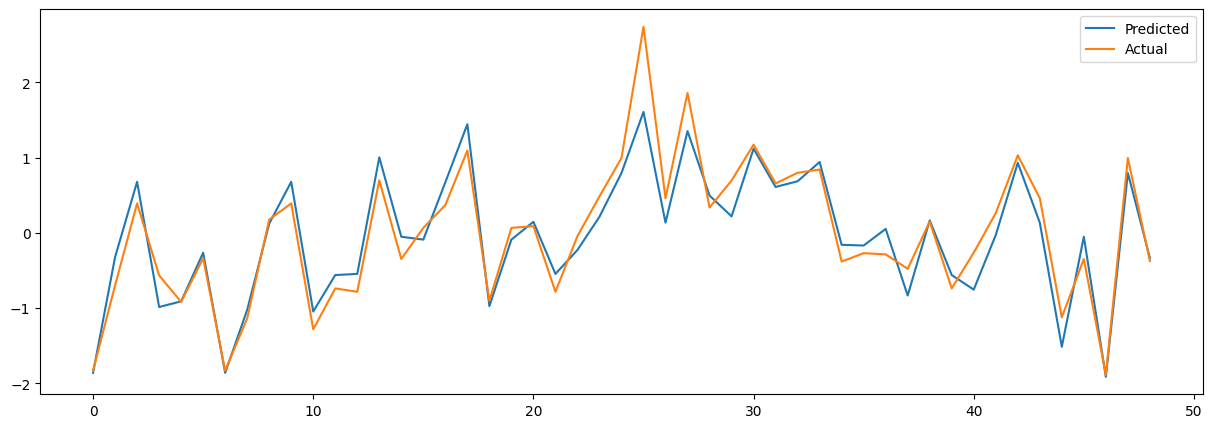

In [36]:
plt.figure(figsize=(15,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Hyperparameter Tuning

# Ridge Regression:-

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
r_model = Ridge()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,10,100,1000],
         'max_iter': [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]}
r_grid = GridSearchCV(r_model, param, scoring='neg_mean_squared_error', cv=5)
r_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                                   2, 10, 100, 1000],
                         'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500,
                                      4000, 4500, 5000]},
             scoring='neg_mean_squared_error')

In [38]:
r_grid.best_params_

{'alpha': 2, 'max_iter': 500}

In [39]:
r_grid.best_score_

-0.10284685521119064

In [40]:
r_grid.score(x_test, y_test)

-0.08689233180479783

In [41]:
r_y_pred = r_grid.predict(x_test)

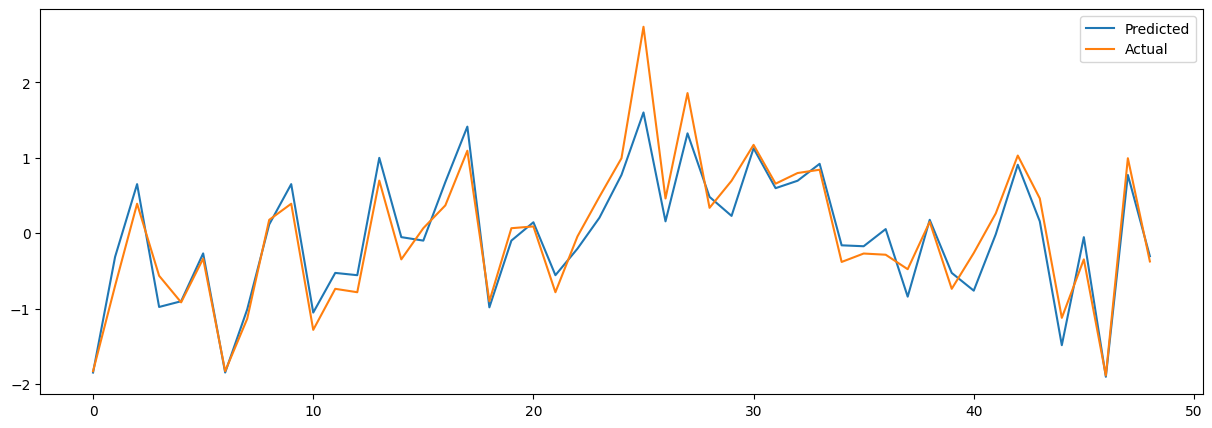

In [42]:
plt.figure(figsize=(15,5))
plt.plot(r_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [43]:
MSE  = mean_squared_error((y_test),(r_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(r_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (r_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.08689233180479783
RMSE : 0.2947750528874481
R2 : 0.8960626927405161
Adjusted R2 :  0.8812145059891613


# Lasso Regression:-

In [44]:
from sklearn.linear_model import Lasso
l_model = Lasso()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,10,100,1000],
        'max_iter': [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]}
l_grid = GridSearchCV(l_model, param, scoring='neg_mean_squared_error', cv=5)
l_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                                   2, 10, 100, 1000],
                         'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500,
                                      4000, 4500, 5000]},
             scoring='neg_mean_squared_error')

In [45]:
l_grid.best_params_

{'alpha': 0.001, 'max_iter': 500}

In [46]:
l_grid.best_score_

-0.10322720942518035

In [47]:
l_grid.score(x_test, y_test)

-0.08737506308865885

In [48]:
l_y_pred = l_grid.predict(x_test)

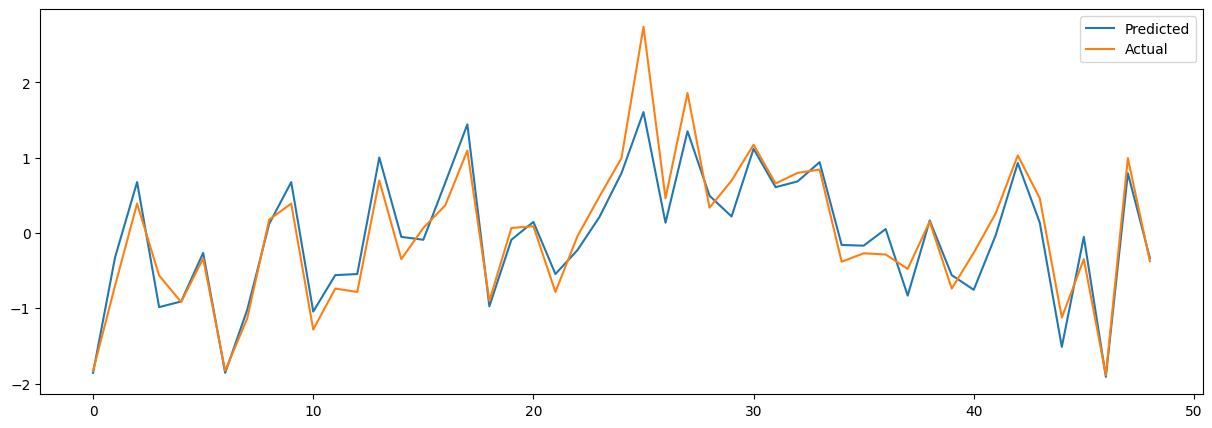

In [49]:
plt.figure(figsize=(15,5))
plt.plot(l_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [50]:
MSE  = mean_squared_error((y_test),(l_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(l_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (l_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.08737506308865885
RMSE : 0.2955927317926793
R2 : 0.8954852679121993
Adjusted R2 :  0.8805545918996563


# Elasticnet regression:-

In [51]:
from sklearn.linear_model import ElasticNet
el_model = ElasticNet()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,10,100,1000],
         'l1_ratio':[0.01,0.001,0.0001,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1,2,3,4,5],
             'max_iter': [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]}
el_grid = GridSearchCV(el_model, param, scoring='neg_mean_squared_error', cv=5)
el_grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4000 fits failed out of a total of 16000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                                   2, 10, 100, 1000],
                         'l1_ratio': [0.01, 0.001, 0.0001, 0.02, 0.03, 0.04,
                                      0.05, 0.06, 0.07, 0.08, 0.09, 1, 2, 3, 4,
                                      5],
                         'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500,
                                      4000, 4500, 5000]},
             scoring='neg_mean_squared_error')

In [52]:
el_grid.score(x_test, y_test)

-0.08702309474185671

In [53]:
el_y_pred = el_grid.predict(x_test)

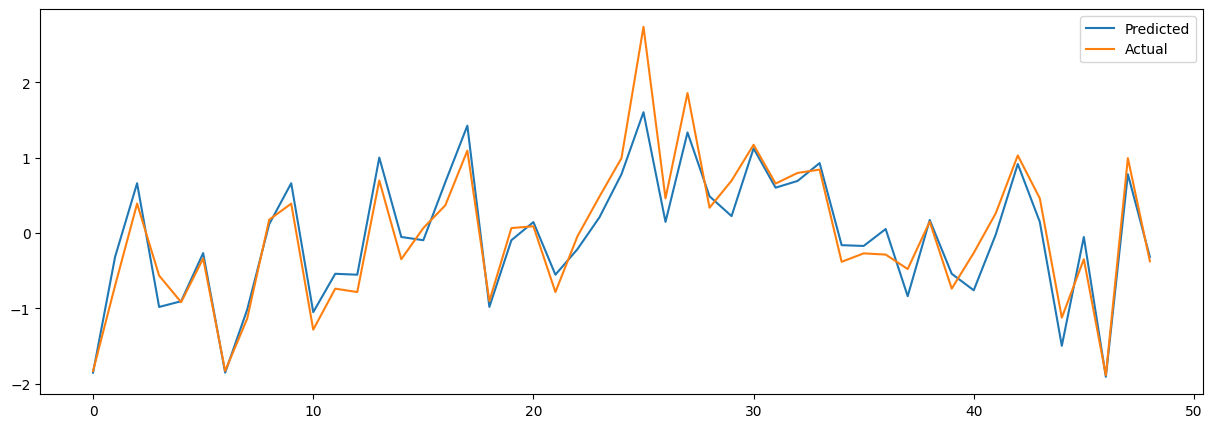

In [54]:
plt.figure(figsize=(15,5))
plt.plot(el_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [55]:
MSE  = mean_squared_error((y_test),(el_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(el_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (el_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.08702309474185671
RMSE : 0.2949967707312348
R2 : 0.895906279081394
Adjusted R2 :  0.8810357475215931


# With Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
mtree = DecisionTreeRegressor()
mtree.fit(x_train,y_train)
y_t_pred = mtree.predict(x_test)

In [57]:
mtree.score(x_train,y_train)

1.0

In [58]:
mtree.score(x_test,y_test)

0.9575871308385882

In [59]:
MSE  = mean_squared_error((y_test),(y_t_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_t_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_t_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.03545746178286334
RMSE : 0.18830151827020233
R2 : 0.9575871308385882
Adjusted R2 :  0.951528149529815


[Text(0.49863138686131386, 0.9615384615384616, 'x[1] <= -0.124\nsquared_error = 1.071\nsamples = 112\nvalue = 0.01'),
 Text(0.22445255474452555, 0.8846153846153846, 'x[5] <= 1.522\nsquared_error = 0.394\nsamples = 46\nvalue = -0.964'),
 Text(0.3615419708029197, 0.9230769230769231, 'True  '),
 Text(0.12773722627737227, 0.8076923076923077, 'x[5] <= -0.07\nsquared_error = 0.145\nsamples = 37\nvalue = -0.705'),
 Text(0.058394160583941604, 0.7307692307692307, 'x[5] <= -0.929\nsquared_error = 0.062\nsamples = 8\nvalue = -0.206'),
 Text(0.029197080291970802, 0.6538461538461539, 'x[3] <= 0.679\nsquared_error = 0.001\nsamples = 3\nvalue = 0.101'),
 Text(0.014598540145985401, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 0.15'),
 Text(0.043795620437956206, 0.5769230769230769, 'squared_error = 0.0\nsamples = 2\nvalue = 0.076'),
 Text(0.08759124087591241, 0.6538461538461539, 'x[4] <= -0.276\nsquared_error = 0.008\nsamples = 5\nvalue = -0.39'),
 Text(0.072992700729927, 0.5769230769

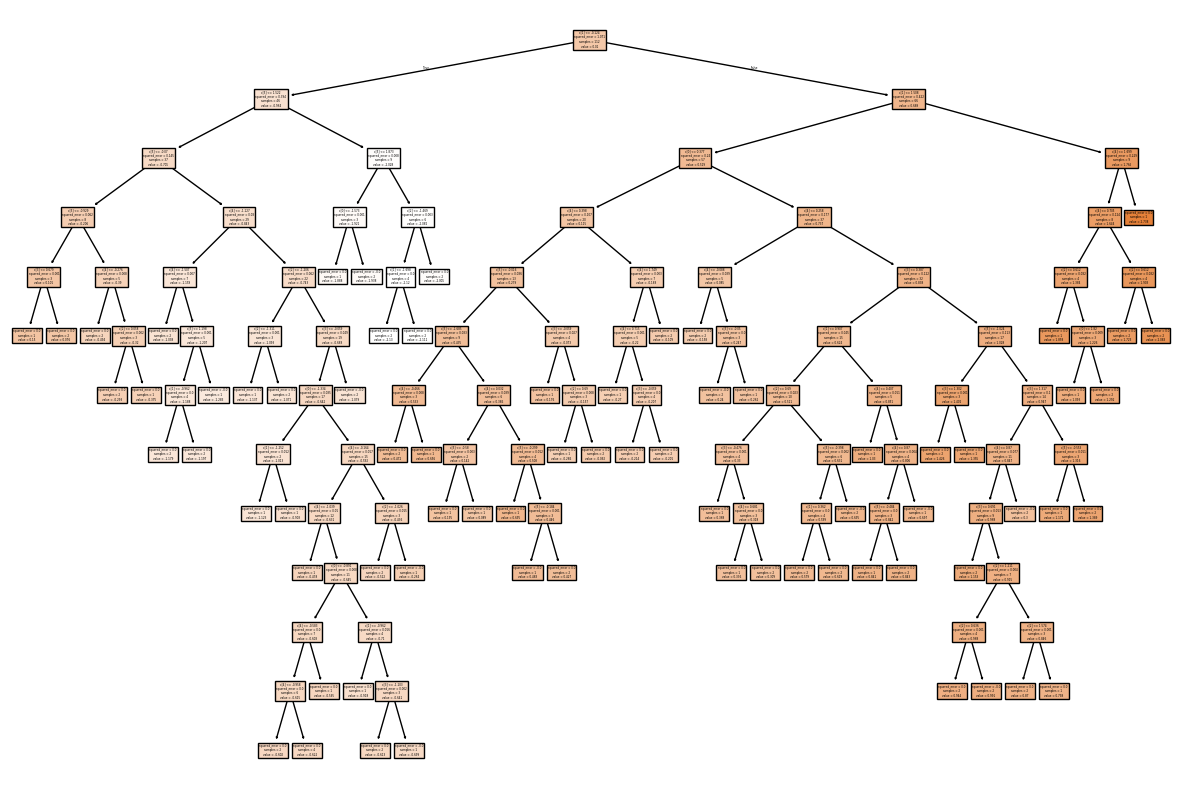

In [60]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(mtree, filled = True)

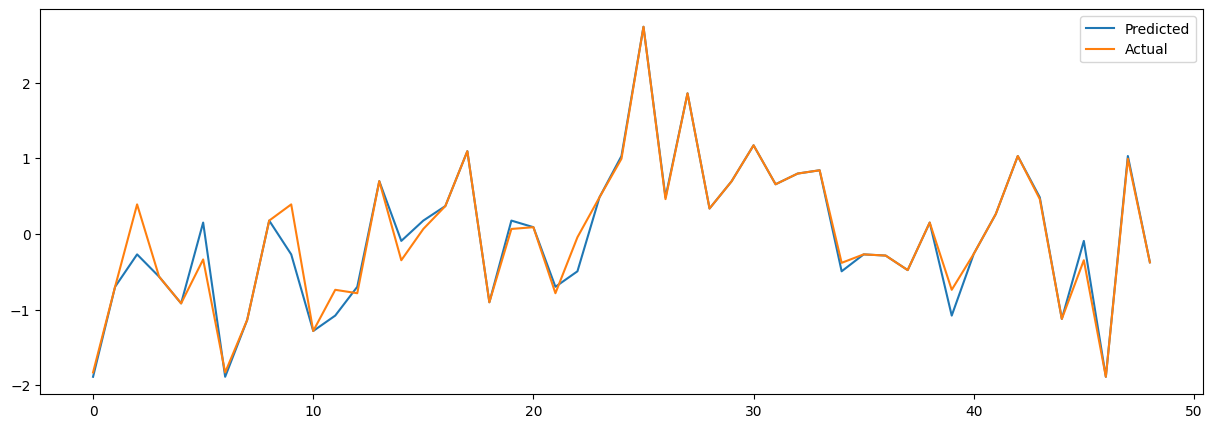

In [61]:
plt.figure(figsize=(15,5))
plt.plot(y_t_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Tunning With Decision Tree:-

In [62]:
tree_param = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
              'splitter':['best', "random"], 
              'max_depth' :[2,3,4,5,6,7,8,9],
              'random_state':[51]}

In [63]:
model_tree = GridSearchCV(mtree, param_grid = tree_param,scoring = 'neg_mean_squared_error', cv = 5)
model_tree.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\L

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [51], 'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [64]:
model_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'random_state': 51,
 'splitter': 'random'}

In [65]:
t_pred = mtree.predict(x_test)

In [66]:
MSE  = mean_squared_error((y_test),(t_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(t_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (t_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.03545746178286334
RMSE : 0.18830151827020233
R2 : 0.9575871308385882
Adjusted R2 :  0.951528149529815


# With RandomForest Regression:-

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rfr = RandomForestRegressor()

In [69]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
rfr_pred = rfr.predict(x_test)

In [71]:
MSE  = mean_squared_error((y_test),(rfr_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(rfr_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (rfr_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.02333013852086963
RMSE : 0.15274206532867635
R2 : 0.9720933743463418
Adjusted R2 :  0.9681067135386764


# Tunning With RandomForestRegression:-

In [72]:
param = {'n_estimators' :[1,10,20,30,40,50,60,70,80,90,100,150,200,250,300],
         'criterion' : ["squared_error", "absolute_error"],
         'max_depth' : [2,3,4,5,6,7,8,9,10],
         'max_leaf_nodes' : [5,10,15,20,25]}

In [73]:
rm_grid = GridSearchCV(rfr, param_grid = param,scoring = 'neg_mean_squared_error', cv = 5)
rm_grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 10, 15, 20, 25],
                         'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 150, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [74]:
rm_grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 9,
 'max_leaf_nodes': 25,
 'n_estimators': 100}

In [75]:
rf_pred = rm_grid.predict(x_test)

In [76]:
MSE  = mean_squared_error((y_test),(rf_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(rf_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (rf_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.030654014351039368
RMSE : 0.17508287852054344
R2 : 0.9633328322285317
Adjusted R2 :  0.9580946654040362


# With SVM Regression

In [77]:
from sklearn.svm import SVR
smodel = SVR()
smodel.fit(x_train,y_train)
y_s_pred = smodel.predict(x_test)

In [78]:
smodel.score(x_train,y_train)

0.9396667265070795

In [79]:
smodel.score(x_test,y_test)

0.883808457862612

In [80]:
MSE  = mean_squared_error((y_test),(y_s_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_s_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_s_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.09713695975505303
RMSE : 0.3116680281245624
R2 : 0.883808457862612
Adjusted R2 :  0.8672096661286994


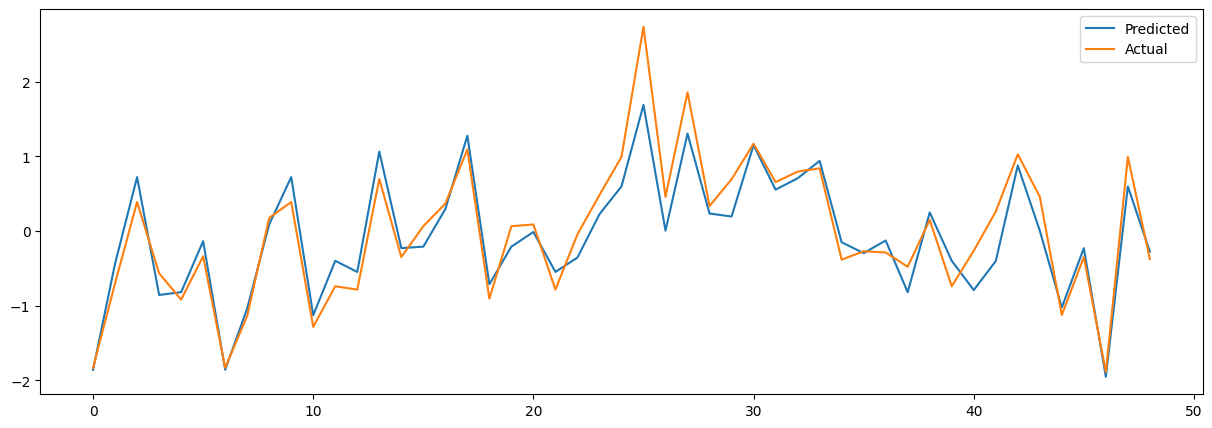

In [81]:
plt.figure(figsize=(15,5))
plt.plot(y_s_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Tunning with svr:-

In [82]:
pgrid = {'C' :[0.1,0.5,1,2,3,4,5],
               'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma':['scale','auto'],
               'tol':[0.001,0.01,0.1,1,2,3],
               'max_iter':[-1,1,2,3,4,5,6,7,8,9,10]}

In [83]:
svc_grid = GridSearchCV(smodel, param_grid = pgrid,scoring = 'neg_mean_squared_error', cv = 3)
svc_grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppDat

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'tol': [0.001, 0.01, 0.1, 1, 2, 3]},
             scoring='neg_mean_squared_error')

In [84]:
svc_grid.best_params_

{'C': 5, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'tol': 0.1}

In [85]:
svc_grid.best_score_

-0.1010744074977889

In [86]:
s_pred = svc_grid.predict(x_test)

In [87]:
MSE  = mean_squared_error((y_test),(s_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(s_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (s_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.06734396801971006
RMSE : 0.2595071637155901
R2 : 0.919445703081581
Adjusted R2 :  0.9079379463789498


# Fom XGBoost

In [88]:
import xgboost as xgb

In [89]:
xbg_model = xgb.XGBRegressor()

In [90]:
xbg_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [91]:
xbg_model.score(x_train,y_train)

0.9999985082938216

In [92]:
xbg_model.score(x_test,y_test)

0.9853808023865404

In [93]:
xgb_pred = xbg_model.predict(x_test)

In [94]:
MSE  = mean_squared_error((y_test),(xgb_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(xgb_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (xgb_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.012221753701751154
RMSE : 0.1105520406946482
R2 : 0.9853808023865404
Adjusted R2 :  0.9832923455846175


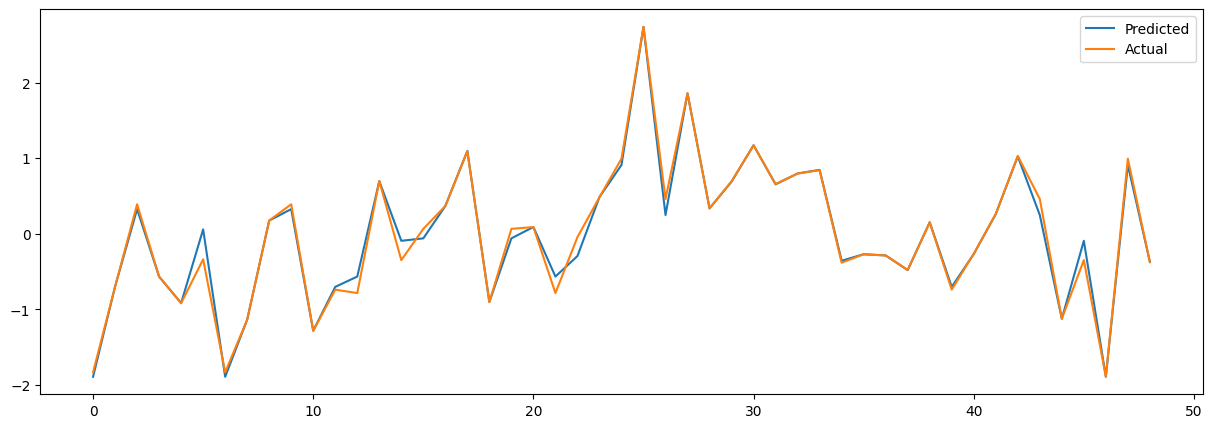

In [95]:
plt.figure(figsize=(15,5))
plt.plot(xgb_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# At the end of this ML experiment we get that "XGBRegressor" give us "98%" accuracy.